## Supervised Learning - Classification

Supervised learning, also known as supervised machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately, which occurs as part of the cross validation process. Supervised learning helps organizations solve for a variety of real-world problems at scale, such as classifying spam in a separate folder from your inbox.

Classification and regression tasks are both types of supervised learning, but the output variables of the two tasks are different. In a regression task, the output variable is a numerical value that exists on a continuous scale, or to put that another way the output of a regression task is an integer or a floating point value.

In contrast, in a classification task, the outputs of an algorithm fall into one of various pre-chosen categories. The classification model attempts to predict the output value when given several input variables, placing the example into the correct category.

Let’s say you have a dataset full of detail about different houses and you want to predict the price the house will sell for. In a regression task, the model takes in the features (like the number of rooms, land area, house age, etc.) and tries to predict a numerical value, like $95, 825.

Mathematically, for {x1,x2,…,xn} being the features and y being the price, let’s assume a hypothesis function 0 such that y= 0(x1,x2,…,xn). The regression model will try to draw a specific that best fit to the dataset.

In a classification task, the outputs would fall into one of a few different categories. Say for example you’d had five different categories for the price:

- Much lower than expected price
- Lower than expected price
- Approximately expected price
- Higher than expected price
- Much higher than expected price
- A classification algorithm would label the example with one of the chosen categories.


![Supervised Learning](./supervised_learning.png)

**Source:**

[Kambria.io](https://kambria.io/blog/logistic-regression-for-machine-learning/#:~:text=Logistic%20regression%20is%20a%20classification,either%20a%200%20or%201.)

[IBM](https://www.ibm.com/cloud/learn/supervised-learning#:~:text=Supervised%20learning%2C%20also%20known%20as,data%20or%20predict%20outcomes%20accurately.)

[Medium](https://medium.com/@jorgesleonel/supervised-learning-c16823b00c13)

## Logistic Regression
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression[1] (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit, hence the alternative names. Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio.

In a binary logistic regression model, the dependent variable has two levels (categorical). Outputs with more than two values are modeled by multinomial logistic regression and, if the multiple categories are ordered, by ordinal logistic regression (for example the proportional odds ordinal logistic model).

![Logistic Regression](./logistic-regression.jpeg)

**The Sigmoid Function**

The sigmoid function/logistic function is a function that resembles an “S” shaped curve when plotted on a graph. It takes values between 0 and 1 and “squishes” them towards the margins at the top and bottom, labeling them as 0 or 1.

The equation for the Sigmoid function is this:

 y=1/(1+e\ex^{-x}) 

What is the variable e in this instance? The e represents the exponential function or exponential constant, and it has a value of approximately 2.71828.


**Source:**

[Kambria.io](https://kambria.io/blog/logistic-regression-for-machine-learning/#:~:text=Logistic%20regression%20is%20a%20classification,either%20a%200%20or%201.)

[Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression#:~:text=Logistic%20regression%20is%20a%20statistical,a%20form%20of%20binary%20regression)


In [32]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [11]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
# Diabets Dataset: Diabets Prediction
df = pd.read_csv("../dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [15]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [16]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [17]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [18]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
log_model = LogisticRegression(solver="liblinear").fit(X,y)

In [20]:
log_model.intercept_

array([-5.88848445])

In [21]:
log_model.coef_

array([[ 1.17086830e-01,  2.83748521e-02, -1.68971977e-02,
         7.45588118e-04, -6.42652274e-04,  5.97050348e-02,
         6.81461374e-01,  7.21476320e-03]])

In [23]:
# Prediction
y_pred = log_model.predict(X)
confusion_matrix(y,y_pred)

array([[448,  52],
       [120, 148]])

In [25]:
accuracy_score(y, y_pred)

0.7760416666666666

In [27]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [28]:
log_model.predict_proba(X)[0:10]

array([[0.35043775, 0.64956225],
       [0.9169891 , 0.0830109 ],
       [0.22455276, 0.77544724],
       [0.92139736, 0.07860264],
       [0.16635686, 0.83364314],
       [0.79900619, 0.20099381],
       [0.88017597, 0.11982403],
       [0.27815669, 0.72184331],
       [0.32117452, 0.67882548],
       [0.92268273, 0.07731727]])

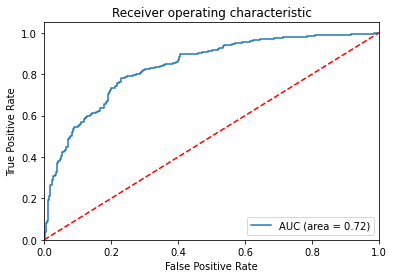

In [29]:
# Creating ROC Curve
logit_roc_auc = roc_auc_score(y, log_model.predict(X))
fpr,  tpr, thresholds = roc_curve(y, log_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label="AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

In [30]:
# Model Tuning
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state=42)
log_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)

In [31]:
y_pred = log_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7575757575757576


In [35]:
cross_val_score(log_model, X_test, y_test, cv=10).mean()

0.7661231884057971

## K-Nearest Nearest Neighbors Classification

![KNN](./knn.png)


In [38]:
# Model and Prediction
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [42]:
y_pred= knn_model.predict(X_test)

In [44]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [ ]:
# Model tuning
knn = KNeighborsClassifier()
knn_params =  {"n_neighbors": np.arange(1,50)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=10, verbose=2).fit(X_train, y_train)

In [48]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [51]:
knn_cv_model.best_score_

0.748637316561845

In [53]:
# Final Model
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)

In [54]:
accuracy_score(y_test, y_pred)

0.7316017316017316

## Support Vector Machines Algorithm

![SVM](./svm.jpeg)

In summary, SVMs pick the decision boundary that maximizes the distance to the support vectors. The decision boundary is drawn in a way that the distance to support vectors are maximized. If the decision boundary is too close to the support vectors then, it will be sensitive to noise and not generalize well.

Sometimes, we might want to allow (on purpose) some margin of error (misclassification). This is the main idea behind the “soft margin”. The soft margin implementation allows some samples to be misclassified or be on the wrong side of decision boundary allowing highly generalized model.
A soft margin SVM solves the following optimization problem:
- Increase the distance of decision boundary to the support vectors (i.e. the margin) and
- Maximize the number of points that are correctly classified in the training set.

**What happens when there is no clear separating hyperplane (kernel SVM) ?**

If we have a dataset that is linearly separable then SVMs job is usually easy. However, in real life, in most of the cases we have a linearly non-separable dataset at hand and this is when the kernel trick provides some magic.
The kernel trick projects the original data points in a higher dimensional space in order to make them linearly separable (in that higher dimensional space).

The kernel trick is based on some Kernel functions that measure similarity of the samples. The trick does not actually transform the data points to a new, high dimensional feature space, explicitly. The kernel-SVM computes the decision boundary in terms of similarity measures in a high-dimensional feature space without actually doing the projection. Some famous kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid kernels.


![SVM Kernel](./svm-kernel.jpeg)

**Source:**
[Towards Data Science](https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8)


In [59]:
# Model & Prediction
# Lets try with linear kernel
svm_model = SVC().fit(X_train, y_train)

In [60]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [61]:
# Model Tuning
svm_params = {"C": np.arange(1,10), "kernel": ["linear", "rbf"]}
svm_cv_model = GridSearchCV(svm_model, svm_params, cv=5, verbose =2, n_jobs=-1).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.1min finished


In [62]:
svm_cv_model.best_params_

{'C': 2, 'kernel': 'linear'}

In [63]:
svm_tuned_model = SVC(C=2, kernel="linear").fit(X_train, y_train)
y_pred = svm_tuned_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Artificial Neural Network Classification
![ANN](./ann.webp)

**Activation Functions**

It’s just a thing function that you use to get the output of node. It is also known as Transfer Function.

**Why we use Activation functions with Neural Networks?**
It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).
The Activation Functions can be basically divided into 2 types-
- Linear Activation Function
- Non-linear Activation Functions

**Linear or Identity Activation Function**

As you can see the function is a line or linear. Therefore, the output of the functions will not be confined between any range.

![Linear Activation](./linear-activation-func.png)

_**Equation :**_ f(x) = x
_**Range :**_ (-infinity to infinity)

It doesn’t help with the complexity or various parameters of usual data that is fed to the neural networks.

**Non-linear Activation Function**

The Nonlinear Activation Functions are the most used activation functions. Nonlinearity helps to makes the graph look something like this

![Non-linear Activation](./nonlinear-activation-func.png)

It makes it easy for the model to generalize or adapt with variety of data and to differentiate between the output.

The main terminologies needed to understand for nonlinear functions are:
- Derivative or Differential: Change in y-axis w.r.t. change in x-axis.It is also known as slope.
- Monotonic function: A function which is either entirely non-increasing or non-decreasing.

The Nonlinear Activation Functions are mainly divided on the basis of their **range or curves**

**1. Sigmoid or Logistic Activation Function**

![Sigmoid](./sigmoid-func.png)

The main reason why we use sigmoid function is because it exists between **(0 to 1)**. Therefore, it is especially used for models where we have to predict the probability as an output.**Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.**

- The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.
- The function is monotonic but function’s derivative is not.
- The logistic sigmoid function can cause a neural network to get stuck at the training time.
- **The softmax function is a more generalized logistic activation function which is used for multiclass classification.**

**2. Tanh or hyperbolic tangent Activation Function**

tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).

![Tanh vs Sigmoid](./tanh-vs-sigmoid.jpeg)

The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.

- The function is differentiable.
- The function is monotonic while its derivative is not monotonic.
- The tanh function is mainly used classification between two classes.
- Both tanh and logistic sigmoid activation functions are used in feed-forward nets.

**3. ReLU (Rectified Linear Unit) Activation Function**

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.

![Relu vs Sigmoid](./relu-vs-sigmoid.png)

In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performance.

- The function and its derivative both are monotonic.

But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

- The sigmoid and hyperbolic tangent activation functions cannot be used in networks with many layers due to the vanishing gradient problem.
- The rectified linear activation function overcomes the vanishing gradient problem, allowing models to learn faster and perform better.
- The rectified linear activation is the default activation when developing multilayer Perceptron and convolutional neural networks.

**4. Leaky ReLU**

It is an attempt to solve the dying ReLU problem.

![Relu vs Leaky Relu](./relu-vs-leakrelu.jpeg)

The leak helps to increase the range of the ReLU function. Usually, the value of a is 0.01 or so.
**When a is not 0.01 then it is called Randomized ReLU.**
Therefore the range of the Leaky ReLU is (-infinity to infinity).
- Both Leaky and Randomized ReLU functions are monotonic in nature. Also, their derivatives also monotonic in nature.

**Why derivative/differentiation is used ?**

When updating the curve, to know in which direction and how much to change or update the curve depending upon the slope.That is why we use differentiation in almost every part of Machine Learning and Deep Learning.act

![Activation Function CheatSheet](./activation-func-cheatsheet.png)

**Limitations of Sigmoid and Tanh Activation Functions**

A general problem with both the sigmoid and tanh functions is that they saturate. This means that large values snap to 1.0 and small values snap to -1 or 0 for tanh and sigmoid respectively. Further, the functions are only really sensitive to changes around their mid-point of their input, such as 0.5 for sigmoid and 0.0 for tanh.

The limited sensitivity and saturation of the function happen regardless of whether the summed activation from the node provided as input contains useful information or not. Once saturated, it becomes challenging for the learning algorithm to continue to adapt the weights to improve the performance of the model.

Finally, as the capability of hardware increased through GPUs’ very deep neural networks using sigmoid and tanh activation functions could not easily be trained.

Layers deep in large networks using these nonlinear activation functions fail to receive useful gradient information. Error is back propagated through the network and used to update the weights. The amount of error decreases dramatically with each additional layer through which it is propagated, given the derivative of the chosen activation function. This is called the vanishing gradient problem and prevents deep (multi-layered) networks from learning effectively.

Vanishing gradients make it difficult to know which direction the parameters should move to improve the cost function.

**Source:**

[Towards Data Science](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6)

[Machine Learning Mastery I](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=for%20Output%20Layers-,Activation%20Functions,a%20layer%20of%20the%20network.)

[Machine Learning Mastery II](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)

[Deep Learning](https://www.amazon.com/Deep-Learning-Adaptive-Computation-Machine/dp/0262035618/ref=as_li_ss_tl?_encoding=UTF8&qid=&sr=&linkCode=sl1&tag=inspiredalgor-20&linkId=807f938a1f72a216f5c33bef861ed5b2&language=en_US)


In [64]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
# Model & Prediction
mlpc_model = MLPClassifier().fit(X_train, y_train)

In [ ]:
mlpc_model.coefs_

In [ ]:
?mlpc_model

In [68]:
y_pred = mlpc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.696969696969697

In [69]:
# Model Tuning
mlpc_params = {"alpha": [1,2,3,5,0.1,0.01,0.03,0.005,0.0001],
"hidden_layer_sizes": [(10,10), (100,100,100), (100,100), (3,5)]}
mlpc = MLPClassifier(solver="lbfgs")
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, verbose=2, n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   55.6s finished
/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [70]:
mlpc_cv_model.best_params_

{'alpha': 3, 'hidden_layer_sizes': (3, 5)}

In [71]:
# Final Model
mlpc_tuned = MLPClassifier(solver="lbfgs", alpha=3, hidden_layer_sizes = (3,5)).fit(X_train, y_train)

In [73]:
y_pred = mlpc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## CART Classification

![Cart](./cart.png)

In [74]:
# Model and Prediction
cart_model = DecisionTreeClassifier().fit(X_train, y_train)
cart_model

DecisionTreeClassifier()

In [75]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

In [ ]:
# Model Tuning
?cart_model

In [88]:
cart = DecisionTreeClassifier()
cart_params = {"max_depth": [3,5,8,10],"min_samples_split": [2,3,5,10,20,50]}

In [89]:
cart_cv_model = GridSearchCV(cart, cart_params, cv=10, verbose=2, n_jobs=-1).fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 209 out of 240 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.2s finished


In [90]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 20}

In [91]:
# Final Model
cart_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=20).fit(X_train, y_train)

In [92]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Random Forest Classification

![Random Forest](./random-forest.png)

![Random Forest vs Decision Tree](./rand-vs-decisiontree.jpeg)

_**Node splitting in a random forest model is based on a random subset of features for each tree**_


**Feature Randomness**

In a normal decision tree, when it is time to split a node, we consider every possible feature and pick the one that produces the most separation between the observations in the left node vs. those in the right node. In contrast, each tree in a random forest can pick only from a random subset of features. This forces even more variation amongst the trees in the model and ultimately results in lower correlation across trees and more diversification.

**Source:**

[Towards Data Science](https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:~:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.)

In [93]:
# Model and Prediction
rf_model = RandomForestClassifier().fit(X_train,y_train)

In [ ]:
?rf_model

In [95]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [96]:
# Model Tuning
rf_params = {"n_estimators": [100,200,500,1000],
"max_features": [3,5,8],
"min_samples_split": [2,5,10,20]}
rf_cv_model =GridSearchCV(rf_model, rf_params, cv=5, verbose=2, n_jobs=-1).fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   25.0s finished


In [97]:
rf_cv_model.best_params_

{'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}

In [98]:
# Final Model
rf_tuned = RandomForestClassifier(max_features=3, min_samples_split=2, n_estimators=200).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

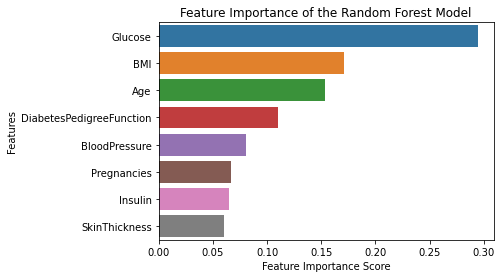

In [99]:
feature_imp = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance of the Random Forest Model")
plt.show()

## Gradient Boosting Classification

The concepts of boosting and bagging are central to understanding these tree-based ensemble models. Boosting describes the combination of many weak learners into one very accurate prediction algorithm. A weak learner refers to a learning algorithm that only predicts slightly better than randomly. When looking at tree-based ensemble algorithms a single decision tree would be the weak learner and the combination of multiple of these would result in the AdaBoost algorithm.

Bagging on the other hand refers to non-sequential learning. For T rounds, a random subset of samples is drawn (with replacement) from the training sample. Each of these draws are independent of the previous round’s draw but have the same distribution. These randomly selected samples are then used to grow a decision tree (weak learner). The most popular class (or average prediction value in case of regression problems) is then chosen as the final prediction value. The bagging approach is also called bootstrapping

![Boosting](./boosting.png)


**AdaBoost**

The AdaBoost algorithm is part of the family of boosting algorithms and was first introduced by Freund & Schapire in 1996. It is sequentially growing decision trees as weak learners and punishing incorrectly predicted samples by assigning a larger weight to them after each round of prediction. This way, the algorithm is learning from previous mistakes. The final prediction is the weighted majority vote (or weighted median in case of regression problems).

![Adaboost](./adaboost.png)

There are certain advantages and disadvantages inherent to the AdaBoost algorithm. AdaBoost is relatively robust to overfitting in low noise datasets (refer to Rätsch et al. (2001)). AdaBoost has only a few hyperparameters that need to be tuned to improve model performance. Moreover, this algorithm is easy to understand and to visualize. However, for noisy data the performance of AdaBoost is debated with some arguing that it generalizes well, while others show that noisy data leads to poor performance due to the algorithm spending too much time on learning extreme cases and skewing results. Compared to random forests and XGBoost, AdaBoost performs worse when irrelevant features are included in the model as shown by my time series analysis of bike sharing demand. Moreover, AdaBoost is not optimized for speed, therefore being significantly slower than XGBoost.

The relevant hyperparameters to tune are limited to the maximum depth of the weak learners/decision trees, the learning rate and the number of iterations/rounds. The learning rate balances the influence of each decision tree on the overall algorithm, while the maximum depth ensures that samples are not memorized, but that the model will generalize well with new data.
The above information shows that AdaBoost is best used in a dataset with low noise, when computational complexity or timeliness of results is not a main concern and when there are not enough resources for broader hyperparameter tuning due to lack of time and knowledge of the user.

**Understanding Gradient Boosting**

Gradient boosting is a machine learning boosting type. It strongly relies on the prediction that the next model will reduce prediction errors when blended with previous ones. The main idea is to establish target outcomes for this upcoming model to minimize errors.

![GBM](./gbm.png)

So, how does one calculate the targets? Every case’s outcome depends on the number of changes brought upon by the prediction and its effects on the prediction error.

If the prediction has a small change and causes a significant error drop, then the case’s expected target outcome will have a high value. Forecasts provided by new models could reduce the errors as long as they are near their targets.
If there are no error changes caused by a small prediction change, then the case’s next outcome will be zero. You cannot minimize the error by changing the prediction.
The term gradient boosting emerged because every case’s target outcomes are based on the gradient’s error with regards to the predictions. Every model reduces prediction errors by taking a step in the correct direction.

**How is Gradient Boosting Useful?**

As discussed earlier, gradient boosting is a widely popular technique for creating predictive models. You can apply it to numerous risk-related functions and improve the model’s predictive accuracy. Gradient boosting also helps resolve various multicollinearity issues where there are high correlations between predictor variables.

You would be surprised to see the amount of success resulting from gradient boosting machines. Numerous machine learning applications have been utilizing it.

**Source:**

[Towards Data Science](https://towardsdatascience.com/the-ultimate-guide-to-adaboost-random-forests-and-xgboost-7f9327061c4f)

[Datascience.eu](https://datascience.eu/machine-learning/gradient-boosting-what-you-need-to-know/)

In [100]:
# Model & Prediction
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [ ]:
?gbm_model

In [102]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

In [104]:
# Model Tuning
gbm_params = {"learning_rate": [0.1,0.01,0.001,0.05],
"n_estimators": [100,200,500,1000],
"max_depth": [2,3,5,8]}
gbm_cv_model = GridSearchCV(gbm_model, gbm_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.1min finished


In [105]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

In [107]:
# Final Model
gbm_tuned_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=500).fit(X_train, y_train)
y_pred = gbm_tuned_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

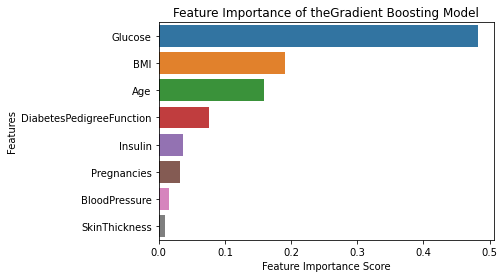

In [116]:
# Feature Importance
feature_imp = pd.Series(gbm_tuned_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance of theGradient Boosting Model")
plt.show()

## XGBoost Algorithm


![XGBoost](./xgboost.png)

In [109]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)

/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:10:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
?xgb_model

In [111]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

In [112]:
# Model Tuning
xgb_params = {
    "n_estimators": [100,200,500,1000],
    "subsample": [0.6,0.8,1],
    "max_depth": [3.5,7],
    "learning_rate": [0.1,0.001,0.01]
}
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 493 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 689 out of 720 | elapsed:  6.2min remaining:   16.8s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  7.1min finished
/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:24:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [113]:
xgb_cv_model.best_params_

{'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.6}

In [114]:
# Final Model
xgb_tuned = XGBClassifier(learning_rate=0.001, max_depth=7, n_estimators=500, subsample=0.6).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

/Users/seneralkan/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:44:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7575757575757576

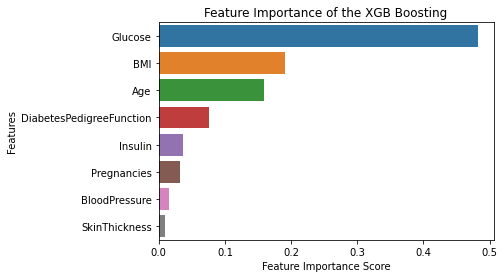

In [115]:
# Feature Importance
feature_imp = pd.Series(gbm_tuned_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance of the XGB Boosting")
plt.show()

## LightGBM Algorithm

![Light GBM](./lightgbm.png)

In [118]:
# Model and Prediction
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [ ]:
?lgbm_model

In [120]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

In [122]:
# Model Tuning

lgbm_params = {
    "learning_rate": [0.001,0.01,0.1],
    "n_estimators": [200,500,1000],
    "max_depth": [1,2,3,8]
}
lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, verbose=2, n_jobs=-1, cv=10).fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 329 out of 360 | elapsed:    3.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    4.0s finished


In [123]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}

In [124]:
# Final Model
lgbm_tuned = LGBMClassifier(learning_rate=0.01, max_depth=1, n_estimators=500).fit(X_train,y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

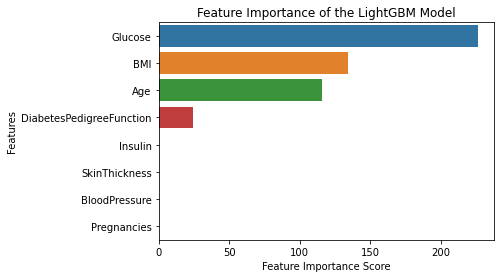

In [132]:
# Feature Importance
feature_imp = pd.Series(lgbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance of the LightGBM Model")
plt.show()

## CatBoost Algorithm

Different stopping conditions and methods of selecting the next partition lead to different learning schemes. The most well-known of these are the leaf-wise and depth-wise approaches.

In the leaf-wise approach, the algorithm splits the partition to achieve the best improvement of the loss function and the procedure continues until we obtain a fixed number of leaves. The algorithm in the depth-wise approach builds the tree level by level until a tree of a fixed depth is built.

CatBoost uses symmetric or oblivious trees. The trees from the music example above are symmetric. In fact, they can be represented as decision tables

![CatBoost](./catboost.png)

CatBoost uses the same features to split learning instances into the left and the right partitions for each level of the tree. In this case a tree of depth k has exactly 2k leaves, and the index of a leaf can be calculated with simple bitwise operations.

Thus, the CatBoost learning scheme is essentially depth-wise with some simplification, obtained from our decision tree type.

The choice of oblivious trees has several advantages compared to the classic ones:

Simple fitting scheme
Efficient to implement on CPU
Ability to make very fast model appliers
This tree structure works as a regularization, so it can provide quality benefits for many tasks
Classical decision tree learning algorithm is computation-intensive. To find the next split, we need to evaluate feature count times observation count for different splitting conditions. This leads to a vast number of possible splits for large datasets using continuous inputs and, in many cases, also leads to overfitting.

Fortunately, boosting allows us to significantly reduce the number of splits that we need to consider. We can make a rough approximation for input features. For example, if we have music track length in seconds, then we can round it off to minutes. Such conversions could be done for any ordered features in an automatic way. The simplest way is to use quantiles of input feature distribution to quantize it. This approach is similar in spirit to using 4 or 8 bit floats for neural networks and other compression techniques applied in deep learning.

Thus, boosting each input could be considered as an integer with several distinct values. By default, CatBoost approximates ordered inputs with 7-bit integers (128 different values).

**Source:**

[Yandex CatBoost Doc](https://catboost.ai/news/catboost-enables-fast-gradient-boosting-on-decision-trees-using-gpus)


In [126]:
# Model and Prediction
from catboost import CatBoostClassifier
catb_model = CatBoostClassifier().fit(X_train, y_train, verbose=False)

In [127]:
y_pred = catb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

In [ ]:
?catb_model

In [ ]:
catb_params={
    "iterations": [200,500,100],
    "learning_rate": [0.1,0.001,0.01],
    "depth": [4,5,8]
}
catb_cv_model = GridSearchCV(catb_model, catb_params, verbose=2, n_jobs=-1).fit(X_train,y_train)

In [130]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [ ]:
# Final Model
catb_tuned = CatBoostClassifier(depth=8, iterations=200, learning_rate=0.01).fit(X_train,y_train)
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

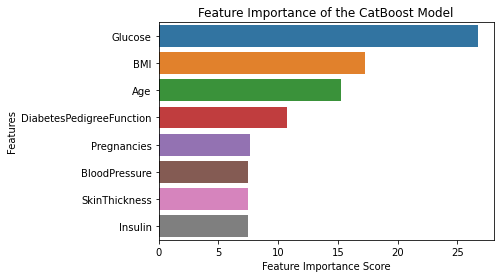

In [133]:
# Feature Importance
feature_imp = pd.Series(catb_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance of the CatBoost Model")
plt.show()